In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sampleTopology as sT
import numpy as np
import matplotlib.pyplot as plt
import pickle

np.set_printoptions(suppress=True)

In [3]:
def acceptreject(L_accept, L_reject):
    L_accept_x = [L_accept[i][0] for i in range(len(L_accept))]
    L_accept_y = [L_accept[i][2] for i in range(len(L_accept))]
    
    L_reject_x = [L_reject[i][0] for i in range(len(L_reject))]
    L_reject_y = [L_reject[i][2] for i in range(len(L_reject))]
    
    return [L_accept_x, L_accept_y, L_reject_x, L_reject_y]

times = []

In [16]:
Manifold = 'E1'

np.random.seed(1234)

precision = 100                 #Number of points in manifold to test
paramPrecision = 1000

alpha = beta = gamma = np.pi/2

L1 = np.random.uniform(low = 0.1, high = 4, size = paramPrecision)
L2 = np.random.uniform(low = L1[0], high = 4, size = paramPrecision)
# L2 = L1.copy()
L3 = np.random.uniform(low = 0.1, high = 3.1, size = paramPrecision)

#Since we are constraining to a square FD, we have L1 twice, otherwise can switch to L1 and L2
random_L_Sample = np.vstack((L1, L2, L3)).T
# random_L_Sample = np.array([[3.87441806,3.87441806,2.50934922]])

# L_sample = np.array([1.5, 1.5, 0.83059 * 3])
# random_L_Sample = np.array([L_sample])

angles = np.array([alpha, beta, gamma])
L_accept = []
L_reject = []
# L_Sample = np.zeros(3)
# for i in range(paramPrecision):
for i in range(random_L_Sample.shape[0]):
    # L_Scale, angles = paramSpace(Manifold, random_L_Sample[0][i], angles)
    L_Sample = random_L_Sample[i]
    # L_Sample = np.array([2.1, 2.1, 0.32564806])
    percents, excludedPoints, allowedPoints = sT.samplePoints(Manifold, angles, precision, L_Sample)

    # print(L_Sample)
    # print(percents, excludedPoints, allowedPoints)
    
    # print()
    # break
    # with open("./data_E5.dat", "a") as f:
    #     f.write(f"{L_Sample[0]:16e},{L_Sample[2]:16e},{1-percents:16e}\n")
    # print(L_Sample, percents)

    if percents > 0.05:
        L_accept.append(L_Sample)
    else:
        L_reject.append(L_Sample)
    # if (i%10 == 0):
    #     print(i)
    # break

# print("============")
# sampled_params_file = open(f'test.obj', 'wb') 
# param_scatter = {'L_accept': L_accept, 'L_reject':L_reject}
# pickle.dump(param_scatter, sampled_params_file)
# sampled_params_file.close()
# plt.close('all')

# print('done')

L_accept = np.array(L_accept)
L_reject = np.array(L_reject)


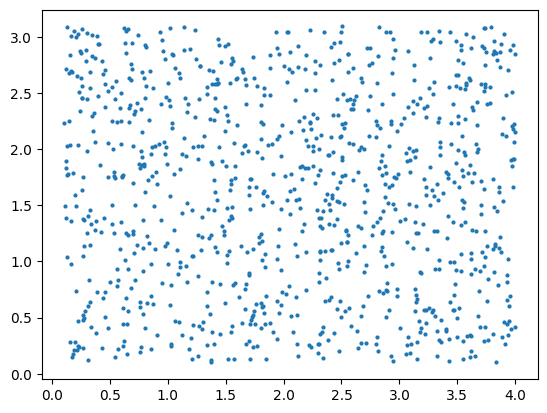

In [17]:
import matplotlib.pyplot as plt

plt.figure()

if len(L_accept) > 0:
    plt.scatter(L_accept[:, 0], L_accept[:, 2], s=4)

if len(L_reject) > 0:
    plt.scatter(L_reject[:, 0], L_reject[:, 2], s=4)

plt.show()

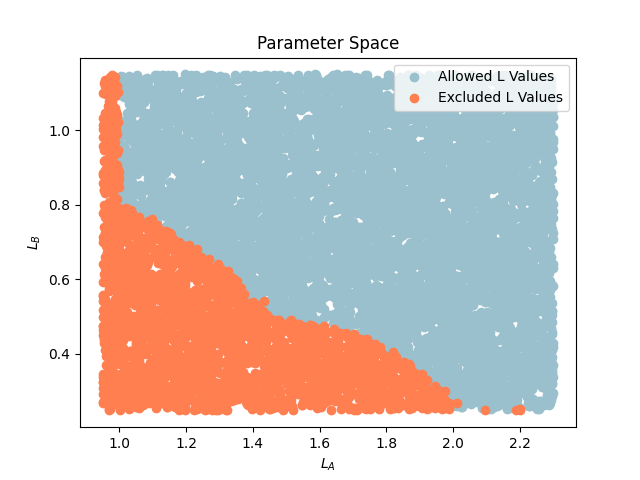

In [64]:
plt.close('all')

#Only needs to be defined correctly when plotting the referee data too
Manifold = 'E1' 


#Loads in the scatter plot file from above
paramSpace_sample = pickle.load(open('E3_param_0_05_zoom.obj', 'rb'))
# paramSpace_sample = pickle.load(open('test.obj', 'rb'))


#Divides the L values between their 'accepted' and 'rejected' status from the Pickle file
L_accept = paramSpace_sample['L_accept']
L_reject = paramSpace_sample['L_reject']


#Reformats the imported data
L_Sliced = acceptreject(L_accept, L_reject)


#Plots the accepted and rejected points in different colours
fig, ax = plt.subplots()
ax.scatter(L_Sliced[0], L_Sliced[1], color = '#9AC0CD', label = "Allowed L Values")
ax.scatter(L_Sliced[2], L_Sliced[3], color = 'coral', label = "Excluded L Values")


#Extra plotting stuff
Manifold = 'E3'
# ax.scatter(refereeData(Manifold)[0], refereeData(Manifold)[1], color = 'black', label = 'Referee')
plt.xlabel(f'$L_A$')
plt.ylabel(f'$L_B$')
plt.title('Parameter Space')
plt.legend(loc = 'upper right')
plt.show()

In [ ]:
def refereeData(Manifold):
    if Manifold == 'E2':
        ref_x = [
        1.0100, 1.0598, 1.1096, 1.1594, 1.2092, 1.2590, 1.3088, 1.3586, 1.4084, 1.4582,
        1.5080, 1.5578, 1.6076, 1.6574, 1.7072, 1.7570, 1.8068, 1.8566, 1.9064, 1.9562]
        #2.0060, 2.0558, 2.1056, 2.1554, 2.2052, 2.2550, 2.3048, 2.3546, 2.4044, 2.4542,
        #2.5040, 2.5538, 2.6036, 2.6534, 2.7032, 2.7530, 2.8028, 2.8526, 2.9024, 2.9522,
        #3.0020, 3.0518, 3.1016, 3.1514, 3.2012, 3.2510, 3.3008, 3.3506, 3.4004, 3.4502
        #]

        ref_y = [
        0.796, 0.773, 0.747, 0.720, 0.689, 0.657, 0.621, 0.581, 0.537, 0.500,
        0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500]
        #0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500,
        #0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500,
        #0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500
        #]
        
    elif Manifold == 'E3':
        ref_x = [
        1.0100, 1.0598, 1.1096, 1.1594, 1.2092, 1.2590, 1.3088, 1.3586, 1.4084, 1.4582,
        1.5080, 1.5578, 1.6076, 1.6574, 1.7072, 1.7570, 1.8068, 1.8566, 1.9064, 1.9562,
        2.0060, 2.0558, 2.1056, 2.1554, 2.2052, 2.2550, 2.3048, 2.3546, 2.4044, 2.4542]
        #2.5040, 2.5538, 2.6036, 2.6534, 2.7032, 2.7530, 2.8028, 2.8526, 2.9024, 2.9522,
        #3.0020, 3.0518, 3.1016, 3.1514, 3.2012, 3.2510, 3.3008, 3.3506, 3.4004, 3.4502
        #]

        ref_y = [
        0.772, 0.772, 0.747, 0.719, 0.689, 0.657, 0.621, 0.581, 0.537, 0.498,
        0.491, 0.483, 0.473, 0.461, 0.447, 0.430, 0.408, 0.379, 0.344, 0.303,
        0.253, 0.250, 0.250, 0.250, 0.250, 0.250, 0.250, 0.250, 0.250, 0.250]
        #0.250, 0.250, 0.250, 0.250, 0.250, 0.250, 0.250, 0.250, 0.250, 0.250,
        #0.250, 0.250, 0.250, 0.250, 0.250, 0.250, 0.250, 0.250, 0.250, 0.250
        #]
        
    return[ref_x, ref_y]

In [ ]:
f = lambda x: x**2
g = lambda x: x + 1
h = lambda x: np.sqrt(x)

In [8]:
def generate_3_vectors(n):
    """Generate all possible 3-vectors of non-negative integers that sum to n."""
    return [(i, j, n - i - j) for i in range(n + 1) for j in range(n + 1 - i) if i + j <= n]


In [48]:
def generate_combs(n):
    combs = np.empty((int((n + 2) * (n + 1) / 2), 3), dtype=np.int8)
    c = 0
    for i in range(n, -1, -1):
        for j in range(n - i, -1, -1):
            if i + j <= n:
                combs[c, :] = np.array([i, j, n - i - j])
                c += 1
    return combs

In [50]:
print(generate_combs(3))

[[3 0 0]
 [2 1 0]
 [2 0 1]
 [1 2 0]
 [1 1 1]
 [1 0 2]
 [0 3 0]
 [0 2 1]
 [0 1 2]
 [0 0 3]]
